In [1]:
import os
import numpy as np
import music21 as m21
import pandas as pd
import json
import matplotlib.pyplot as plt
from scipy import stats
import time
from IPython.display import display

np.random.seed(777)
us = m21.environment.UserSettings()
us['musescoreDirectPNGPath']='/home/sirivasv/.local/bin/MuseScore-3.5.2.312125617-x86_64.AppImage'
# us['musescoreDirectPNGPath']="/home/sirivasv/Downloads/MuseScore-3.4.2-x86_64.AppImage"

In [2]:
def replace_verbose_name(verbose_name):
    verbose_name = verbose_name.replace("MIDI_Grammar_SOLO_LEN12", "GSOLO")
    verbose_name = verbose_name.replace("MIDI_Grammar_TRADE", "TRADE")
    return verbose_name

In [3]:
all_similarities_store = {}
with open('./CCEvaluation_groups.json') as json_file:
    all_similarities_store = json.load(json_file)

# Analysis 1 - 2D Plane

## 2D Plane OPTION 1 
 * Y axis - Test Artists (Average of Charlie Parker & Miles Davis Grammars Len12)
 * X axis - Caleb Rascon Corpus

## 2D Plane OPTION 2
 * Y axis - Test Artists (Average of Charlie Parker & Miles Davis Grammars Len12)
 * X axis - Caleb Rascon Grammar Len12

### Axis Y values

In [4]:
axis_Y = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[7] + "_" + keyname_i.split(":")[0].split("/")[8]
    directory_B = keyname_i.split(":")[1].split("/")[7] + "_" + keyname_i.split(":")[1].split("/")[8]
    
    # We skip the Axis X options
    if (directory_A == "CalebRascon_CORPUS") or (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12") :
        continue
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
   
    if (directory_B not in axis_Y):
        axis_Y[directory_B] = []
        
    if (directory_B == "MilesDavis_GSOLO") or (directory_B == "CalebRascon_TRADE_Miles"):
        if (directory_A != "MilesDavis_GSOLO"):
            continue
    
    if (directory_B == "CharlieParker_GSOLO") or (directory_B == "CalebRascon_TRADE_CharlieParker"):
        if (directory_A != "CharlieParker_GSOLO"):
            continue
    print(directory_A + " , " + directory_B)
    
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_Y[directory_B].append(current_sim_df.mean())
    

MilesDavis_GSOLO , CalebRascon_CORPUS
MilesDavis_GSOLO , CalebRascon_GSOLO
MilesDavis_GSOLO , MilesDavis_GSOLO
MilesDavis_GSOLO , CalebRascon_TRADE_Caleb
MilesDavis_GSOLO , CalebRascon_TRADE_Miles
CharlieParker_GSOLO , CalebRascon_CORPUS
CharlieParker_GSOLO , CalebRascon_GSOLO
CharlieParker_GSOLO , CharlieParker_GSOLO
CharlieParker_GSOLO , CalebRascon_TRADE_Caleb
CharlieParker_GSOLO , CalebRascon_TRADE_CharlieParker


In [5]:
for keynameY_i in list(axis_Y.keys()):
    axis_Y[keynameY_i] = pd.DataFrame(axis_Y[keynameY_i]).mean()

### Axis X values

In [6]:
axis_X = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[7] + "_" + keyname_i.split(":")[0].split("/")[8]
    directory_B = keyname_i.split(":")[1].split("/")[7] + "_" + keyname_i.split(":")[1].split("/")[8]
    
    # We skip the Axis X options
    # OPTION 1
    if not (directory_A == "CalebRascon_CORPUS"):
        continue
    
    # OPTION 2
    # if not (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12"):
    #     continue
    
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
    print(directory_A + " , " + directory_B)
    
    if (directory_B not in axis_X):
        axis_X[directory_B] = []
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_X[directory_B].append(current_sim_df.mean())
    

CalebRascon_CORPUS , CalebRascon_CORPUS
CalebRascon_CORPUS , CalebRascon_GSOLO
CalebRascon_CORPUS , MilesDavis_GSOLO
CalebRascon_CORPUS , CharlieParker_GSOLO
CalebRascon_CORPUS , CalebRascon_TRADE_Caleb
CalebRascon_CORPUS , CalebRascon_TRADE_Miles
CalebRascon_CORPUS , CalebRascon_TRADE_CharlieParker


In [7]:
for keynameX_i in list(axis_X.keys()):
    axis_X[keynameX_i] = pd.DataFrame(axis_X[keynameX_i]).mean()

### Coordinate representation

Text(0, 0.5, 'Reference Artists Avg')

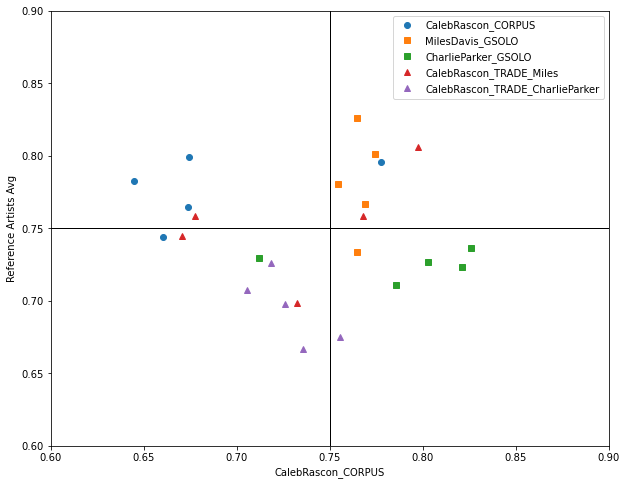

In [8]:
markers_plt = ['o', 's', 's', '^', '^', '^', '>', 's', 'd', ',']
# ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
marker_i = 0
plt.figure(figsize=(10,8))
plt.xlim(0.6, 0.9);
plt.ylim(0.6, 0.9);

for keyname_i in axis_X:
    current_X_values = []
    current_Y_values = []
    if ("CalebRascon_GSOLO" == keyname_i) or ("CalebRascon_TRADE_Caleb" == keyname_i) :
        continue
    for i in range(len(axis_X[keyname_i])): 
        # print(axis_X[keyname_i][i], axis_Y[keyname_i][i])
        current_X_values.append(axis_X[keyname_i][i])
        current_Y_values.append(axis_Y[keyname_i][i])
    
    plt.plot(current_X_values, current_Y_values, markers_plt[marker_i], label=keyname_i)
    marker_i += 1

plt.plot([0.75, 0.75], [0.6, 0.9], 'k-', lw=1)
plt.plot([0.6, 0.9], [0.75, 0.75], 'k-', lw=1)
plt.legend(numpoints=1)
plt.xlabel("CalebRascon_CORPUS")
plt.ylabel("Reference Artists Avg")

# Analysis 2 - Bar plot

## Bar plot
 * Y axis - Average Similarity
 * X axis - Same Artist, Distinct Artists, Trade Between artists

### Same Artist

In [9]:
same_artist = []
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[7] + "_" + keyname_i.split(":")[0].split("/")[8]
    directory_B = keyname_i.split(":")[1].split("/")[7] + "_" + keyname_i.split(":")[1].split("/")[8]
    
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
    # We skip non GSOLO 
    if "GSOLO" not in directory_A and "CORPUS" not in directory_A:
        continue
    if "CalebRascon_GSOLO" == directory_A:
        continue
    if "GSOLO" not in directory_B and "CORPUS" not in directory_B:
        continue
    if "CalebRascon_GSOLO" == directory_B:
        continue
        
    if not (directory_A == directory_B):
        continue
    print(directory_A + " , " + directory_B)
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    same_artist.append(np.mean(current_sim_df.mean()))
same_artist

CalebRascon_CORPUS , CalebRascon_CORPUS
MilesDavis_GSOLO , MilesDavis_GSOLO
CharlieParker_GSOLO , CharlieParker_GSOLO


[0.6862116345828623, 0.781862215612253, 0.7255175983436853]

In [10]:
same_artist_avg = np.mean(same_artist)
same_artist_avg

0.7311971495129335

### Different Artist

In [11]:
diff_artist = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[7] + "_" + keyname_i.split(":")[0].split("/")[8]
    directory_B = keyname_i.split(":")[1].split("/")[7] + "_" + keyname_i.split(":")[1].split("/")[8]
    
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
    # We skip non GSOLO 
    if "GSOLO" not in directory_A and "CORPUS" not in directory_A:
        continue
    if "CalebRascon_GSOLO" == directory_A:
        continue
    if "GSOLO" not in directory_B and "CORPUS" not in directory_B:
        continue
    if "CalebRascon_GSOLO" == directory_B:
        continue
        
    if (directory_A == directory_B):
        continue
    print(directory_A + " , " + directory_B)
    if (directory_B not in diff_artist):
        diff_artist[directory_B] = []
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    diff_artist[directory_B].append(np.mean(current_sim_df.mean()))
diff_artist

CalebRascon_CORPUS , MilesDavis_GSOLO
CalebRascon_CORPUS , CharlieParker_GSOLO
MilesDavis_GSOLO , CalebRascon_CORPUS
MilesDavis_GSOLO , CharlieParker_GSOLO
CharlieParker_GSOLO , CalebRascon_CORPUS
CharlieParker_GSOLO , MilesDavis_GSOLO


{'MilesDavis_GSOLO': [0.7654472515259512, 0.8282969435379162],
 'CharlieParker_GSOLO': [0.7895902726602801, 0.8282969435379162],
 'CalebRascon_CORPUS': [0.7654472515259512, 0.78959027266028]}

In [12]:
diff_artist_avg_list = []
for keyname_diff in diff_artist:
    diff_artist_avg_list.append(np.mean(diff_artist[keyname_diff]))
diff_artist_avg_list

[0.7968720975319337, 0.8089436080990982, 0.7775187620931157]

In [13]:
diff_artist_avg = np.mean(diff_artist_avg_list)
diff_artist_avg

0.7944448225747158

### Trades

In [14]:
trades_artists = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[7] + "_" + keyname_i.split(":")[0].split("/")[8]
    directory_B = keyname_i.split(":")[1].split("/")[7] + "_" + keyname_i.split(":")[1].split("/")[8]
    
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
    # We skip non GSOLO in A
    if "GSOLO" not in directory_A and "CORPUS" not in directory_A:
        continue
    if "CalebRascon_GSOLO" == directory_A:
        continue
    
    # We skip non TRADE in B
    if "TRADE" not in directory_B:
        continue
    if "CalebRascon_TRADE_Caleb" == directory_B:
        continue
    
    trading_from = directory_B.split("_")[0]
    trading_with = directory_B.split("_")[2]
    if (trading_with not in directory_A) and (trading_from not in directory_A):
        continue
    
    print(directory_A + " , " + directory_B)
    if (directory_B not in trades_artists):
        trades_artists[directory_B] = []
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    trades_artists[directory_B].append(np.mean(current_sim_df.mean()))
trades_artists

CalebRascon_CORPUS , CalebRascon_TRADE_Miles
CalebRascon_CORPUS , CalebRascon_TRADE_CharlieParker
MilesDavis_GSOLO , CalebRascon_TRADE_Miles
CharlieParker_GSOLO , CalebRascon_TRADE_CharlieParker


{'CalebRascon_TRADE_Miles': [0.7291504522500383, 0.7532848736554631],
 'CalebRascon_TRADE_CharlieParker': [0.7283740448712199, 0.6947068606312036]}

In [15]:
trades_artists_avg_list = []
for keyname_trade in trades_artists:
    trades_artists_avg_list.append(np.mean(trades_artists[keyname_trade]))
trades_artists_avg_list

[0.7412176629527507, 0.7115404527512117]

In [16]:
trades_artists_avg = np.mean(trades_artists_avg_list)
trades_artists_avg

0.7263790578519812

Text(0, 0.5, 'Similarity Avg')

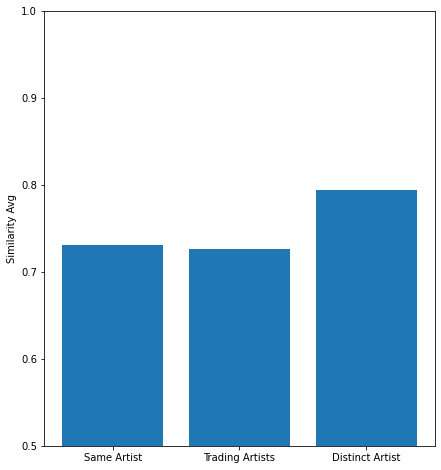

In [17]:
labels = ['Same Artist', 'Trading Artists', 'Distinct Artist']
values = [same_artist_avg, trades_artists_avg, diff_artist_avg]
fig, ax = plt.subplots(figsize=(7,8))

ax.bar(labels,values)
ax.set_ylim(0.5,1.0)
ax.set_ylabel("Similarity Avg")

# Analysis 3 - 2D Plane For Comparison with Local Alignment

In [18]:
all_similarities_store = {}
with open('./CCEvaluation_groups_LA.json') as json_file:
    all_similarities_store = json.load(json_file)

### Axis Y values

In [19]:
axis_Y = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[7] + "_" + keyname_i.split(":")[0].split("/")[8]
    directory_B = keyname_i.split(":")[1].split("/")[7] + "_" + keyname_i.split(":")[1].split("/")[8]
    
    # We skip the Axis X options
    if (directory_A == "CalebRascon_CORPUS") or (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12") :
        continue
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
   
    if (directory_B not in axis_Y):
        axis_Y[directory_B] = []
        
    if (directory_B == "MilesDavis_GSOLO") or (directory_B == "CalebRascon_TRADE_Miles"):
        if (directory_A != "MilesDavis_GSOLO"):
            continue
    
    if (directory_B == "CharlieParker_GSOLO") or (directory_B == "CalebRascon_TRADE_CharlieParker"):
        if (directory_A != "CharlieParker_GSOLO"):
            continue
    print(directory_A + " , " + directory_B)
    
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_Y[directory_B].append(current_sim_df.mean())
    

MilesDavis_GSOLO , CalebRascon_CORPUS
MilesDavis_GSOLO , CalebRascon_GSOLO
MilesDavis_GSOLO , MilesDavis_GSOLO
MilesDavis_GSOLO , CalebRascon_TRADE_Caleb
MilesDavis_GSOLO , CalebRascon_TRADE_Miles
CharlieParker_GSOLO , CalebRascon_CORPUS
CharlieParker_GSOLO , CalebRascon_GSOLO
CharlieParker_GSOLO , CharlieParker_GSOLO
CharlieParker_GSOLO , CalebRascon_TRADE_Caleb
CharlieParker_GSOLO , CalebRascon_TRADE_CharlieParker


In [20]:
for keynameY_i in list(axis_Y.keys()):
    axis_Y[keynameY_i] = pd.DataFrame(axis_Y[keynameY_i]).mean()

### Axis X values

In [21]:
axis_X = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[7] + "_" + keyname_i.split(":")[0].split("/")[8]
    directory_B = keyname_i.split(":")[1].split("/")[7] + "_" + keyname_i.split(":")[1].split("/")[8]
    
    # We skip the Axis X options
    # OPTION 1
    if not (directory_A == "CalebRascon_CORPUS"):
        continue
    
    # OPTION 2
    # if not (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12"):
    #     continue
    
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
    print(directory_A + " , " + directory_B)
    
    if (directory_B not in axis_X):
        axis_X[directory_B] = []
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_X[directory_B].append(current_sim_df.mean())
    

CalebRascon_CORPUS , CalebRascon_CORPUS
CalebRascon_CORPUS , CalebRascon_GSOLO
CalebRascon_CORPUS , MilesDavis_GSOLO
CalebRascon_CORPUS , CharlieParker_GSOLO
CalebRascon_CORPUS , CalebRascon_TRADE_Caleb
CalebRascon_CORPUS , CalebRascon_TRADE_Miles
CalebRascon_CORPUS , CalebRascon_TRADE_CharlieParker


In [22]:
for keynameX_i in list(axis_X.keys()):
    axis_X[keynameX_i] = pd.DataFrame(axis_X[keynameX_i]).mean()

### Coordinate representation

Text(0, 0.5, 'Reference Artists Avg')

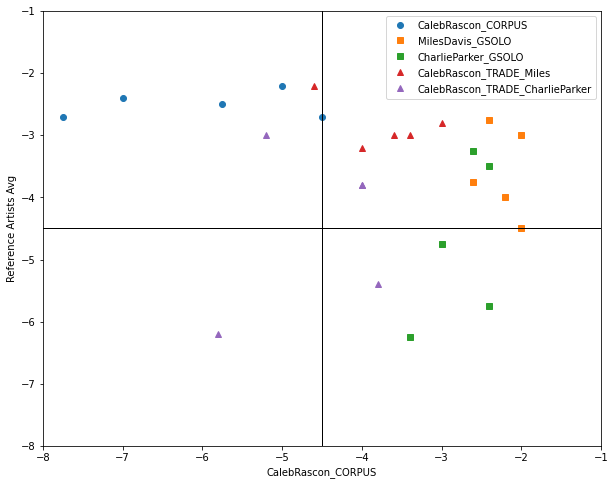

In [23]:
markers_plt = ['o', 's', 's', '^', '^', '^', '>', 's', 'd', ',']
# ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
marker_i = 0
plt.figure(figsize=(10,8))
plt.xlim(-8, -1);
plt.ylim(-8, -1);

for keyname_i in axis_X:
    current_X_values = []
    current_Y_values = []
    if ("CalebRascon_GSOLO" == keyname_i) or ("CalebRascon_TRADE_Caleb" == keyname_i) :
        continue
    for i in range(len(axis_X[keyname_i])): 
        # print(axis_X[keyname_i][i], axis_Y[keyname_i][i])
        current_X_values.append(axis_X[keyname_i][i])
        current_Y_values.append(axis_Y[keyname_i][i])
    
    plt.plot(current_X_values, current_Y_values, markers_plt[marker_i], label=keyname_i)
    marker_i += 1

plt.plot([-4.5, -4.5], [-1, -8], 'k-', lw=1)
plt.plot([-1, -8], [-4.5, -4.5], 'k-', lw=1)
plt.legend(numpoints=1)
plt.xlabel("CalebRascon_CORPUS")
plt.ylabel("Reference Artists Avg")

# Analysis 4 - 2D Plane For Comparison with Euclidean Distance

In [24]:
all_similarities_store = {}
with open('./CCEvaluation_groups_ED.json') as json_file:
    all_similarities_store = json.load(json_file)

### Axis Y values

In [25]:
axis_Y = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[7] + "_" + keyname_i.split(":")[0].split("/")[8]
    directory_B = keyname_i.split(":")[1].split("/")[7] + "_" + keyname_i.split(":")[1].split("/")[8]
    
    # We skip the Axis X options
    if (directory_A == "CalebRascon_CORPUS") or (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12") :
        continue
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
   
    if (directory_B not in axis_Y):
        axis_Y[directory_B] = []
        
    if (directory_B == "MilesDavis_GSOLO") or (directory_B == "CalebRascon_TRADE_Miles"):
        if (directory_A != "MilesDavis_GSOLO"):
            continue
    
    if (directory_B == "CharlieParker_GSOLO") or (directory_B == "CalebRascon_TRADE_CharlieParker"):
        if (directory_A != "CharlieParker_GSOLO"):
            continue
    print(directory_A + " , " + directory_B)
    
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_Y[directory_B].append(current_sim_df.mean())
    

MilesDavis_GSOLO , CalebRascon_CORPUS
MilesDavis_GSOLO , CalebRascon_GSOLO
MilesDavis_GSOLO , MilesDavis_GSOLO
MilesDavis_GSOLO , CalebRascon_TRADE_Caleb
MilesDavis_GSOLO , CalebRascon_TRADE_Miles
CharlieParker_GSOLO , CalebRascon_CORPUS
CharlieParker_GSOLO , CalebRascon_GSOLO
CharlieParker_GSOLO , CharlieParker_GSOLO
CharlieParker_GSOLO , CalebRascon_TRADE_Caleb
CharlieParker_GSOLO , CalebRascon_TRADE_CharlieParker


In [26]:
for keynameY_i in list(axis_Y.keys()):
    axis_Y[keynameY_i] = pd.DataFrame(axis_Y[keynameY_i]).mean()

### Axis X values

In [27]:
axis_X = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[7] + "_" + keyname_i.split(":")[0].split("/")[8]
    directory_B = keyname_i.split(":")[1].split("/")[7] + "_" + keyname_i.split(":")[1].split("/")[8]
    
    # We skip the Axis X options
    # OPTION 1
    if not (directory_A == "CalebRascon_CORPUS"):
        continue
    
    # OPTION 2
    # if not (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12"):
    #     continue
    
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
    print(directory_A + " , " + directory_B)
    
    if (directory_B not in axis_X):
        axis_X[directory_B] = []
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_X[directory_B].append(current_sim_df.mean())
    

CalebRascon_CORPUS , CalebRascon_CORPUS
CalebRascon_CORPUS , CalebRascon_GSOLO
CalebRascon_CORPUS , MilesDavis_GSOLO
CalebRascon_CORPUS , CharlieParker_GSOLO
CalebRascon_CORPUS , CalebRascon_TRADE_Caleb
CalebRascon_CORPUS , CalebRascon_TRADE_Miles
CalebRascon_CORPUS , CalebRascon_TRADE_CharlieParker


In [28]:
for keynameX_i in list(axis_X.keys()):
    axis_X[keynameX_i] = pd.DataFrame(axis_X[keynameX_i]).mean()

### Coordinate representation

Text(0, 0.5, 'Reference Artists Avg')

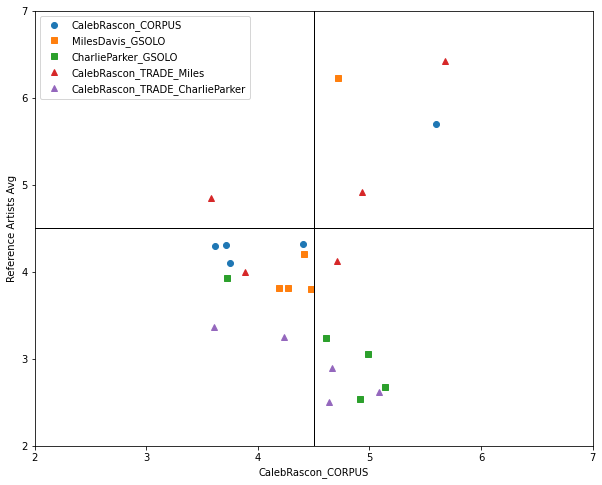

In [29]:
markers_plt = ['o', 's', 's', '^', '^', '^', '>', 's', 'd', ',']
# ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
marker_i = 0
plt.figure(figsize=(10,8))
plt.xlim(2, 7);
plt.ylim(2, 7);

for keyname_i in axis_X:
    current_X_values = []
    current_Y_values = []
    if ("CalebRascon_GSOLO" == keyname_i) or ("CalebRascon_TRADE_Caleb" == keyname_i) :
        continue
    for i in range(len(axis_X[keyname_i])): 
        # print(axis_X[keyname_i][i], axis_Y[keyname_i][i])
        current_X_values.append(axis_X[keyname_i][i])
        current_Y_values.append(axis_Y[keyname_i][i])
    
    plt.plot(current_X_values, current_Y_values, markers_plt[marker_i], label=keyname_i)
    marker_i += 1

plt.plot([4.5, 4.5], [2, 7], 'k-', lw=1)
plt.plot([2, 7], [4.5, 4.5], 'k-', lw=1)
plt.legend(numpoints=1)
plt.xlabel("CalebRascon_CORPUS")
plt.ylabel("Reference Artists Avg")

# Analysis 3 - 2D Plane For Comparison with SIAM

In [30]:
all_similarities_store = {}
with open('./CCEvaluation_groups_SIAM.json') as json_file:
    all_similarities_store = json.load(json_file)

### Axis Y values

In [31]:
axis_Y = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[7] + "_" + keyname_i.split(":")[0].split("/")[8]
    directory_B = keyname_i.split(":")[1].split("/")[7] + "_" + keyname_i.split(":")[1].split("/")[8]
    
    # We skip the Axis X options
    if (directory_A == "CalebRascon_CORPUS") or (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12") :
        continue
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
   
    if (directory_B not in axis_Y):
        axis_Y[directory_B] = []
        
    if (directory_B == "MilesDavis_GSOLO") or (directory_B == "CalebRascon_TRADE_Miles"):
        if (directory_A != "MilesDavis_GSOLO"):
            continue
    
    if (directory_B == "CharlieParker_GSOLO") or (directory_B == "CalebRascon_TRADE_CharlieParker"):
        if (directory_A != "CharlieParker_GSOLO"):
            continue
    print(directory_A + " , " + directory_B)
    
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_Y[directory_B].append(current_sim_df.mean())
    

MilesDavis_GSOLO , CalebRascon_CORPUS
MilesDavis_GSOLO , CalebRascon_GSOLO
MilesDavis_GSOLO , MilesDavis_GSOLO
MilesDavis_GSOLO , CalebRascon_TRADE_Caleb
MilesDavis_GSOLO , CalebRascon_TRADE_Miles
CharlieParker_GSOLO , CalebRascon_CORPUS
CharlieParker_GSOLO , CalebRascon_GSOLO
CharlieParker_GSOLO , CharlieParker_GSOLO
CharlieParker_GSOLO , CalebRascon_TRADE_Caleb
CharlieParker_GSOLO , CalebRascon_TRADE_CharlieParker


In [32]:
for keynameY_i in list(axis_Y.keys()):
    axis_Y[keynameY_i] = pd.DataFrame(axis_Y[keynameY_i]).mean()

### Axis X values

In [33]:
axis_X = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[7] + "_" + keyname_i.split(":")[0].split("/")[8]
    directory_B = keyname_i.split(":")[1].split("/")[7] + "_" + keyname_i.split(":")[1].split("/")[8]
    
    # We skip the Axis X options
    # OPTION 1
    if not (directory_A == "CalebRascon_CORPUS"):
        continue
    
    # OPTION 2
    # if not (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12"):
    #     continue
    
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
    print(directory_A + " , " + directory_B)
    
    if (directory_B not in axis_X):
        axis_X[directory_B] = []
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_X[directory_B].append(current_sim_df.mean())
    

CalebRascon_CORPUS , CalebRascon_CORPUS
CalebRascon_CORPUS , CalebRascon_GSOLO
CalebRascon_CORPUS , MilesDavis_GSOLO
CalebRascon_CORPUS , CharlieParker_GSOLO
CalebRascon_CORPUS , CalebRascon_TRADE_Caleb
CalebRascon_CORPUS , CalebRascon_TRADE_Miles
CalebRascon_CORPUS , CalebRascon_TRADE_CharlieParker


In [34]:
for keynameX_i in list(axis_X.keys()):
    axis_X[keynameX_i] = pd.DataFrame(axis_X[keynameX_i]).mean()

### Coordinate representation

Text(0, 0.5, 'Reference Artists Avg')

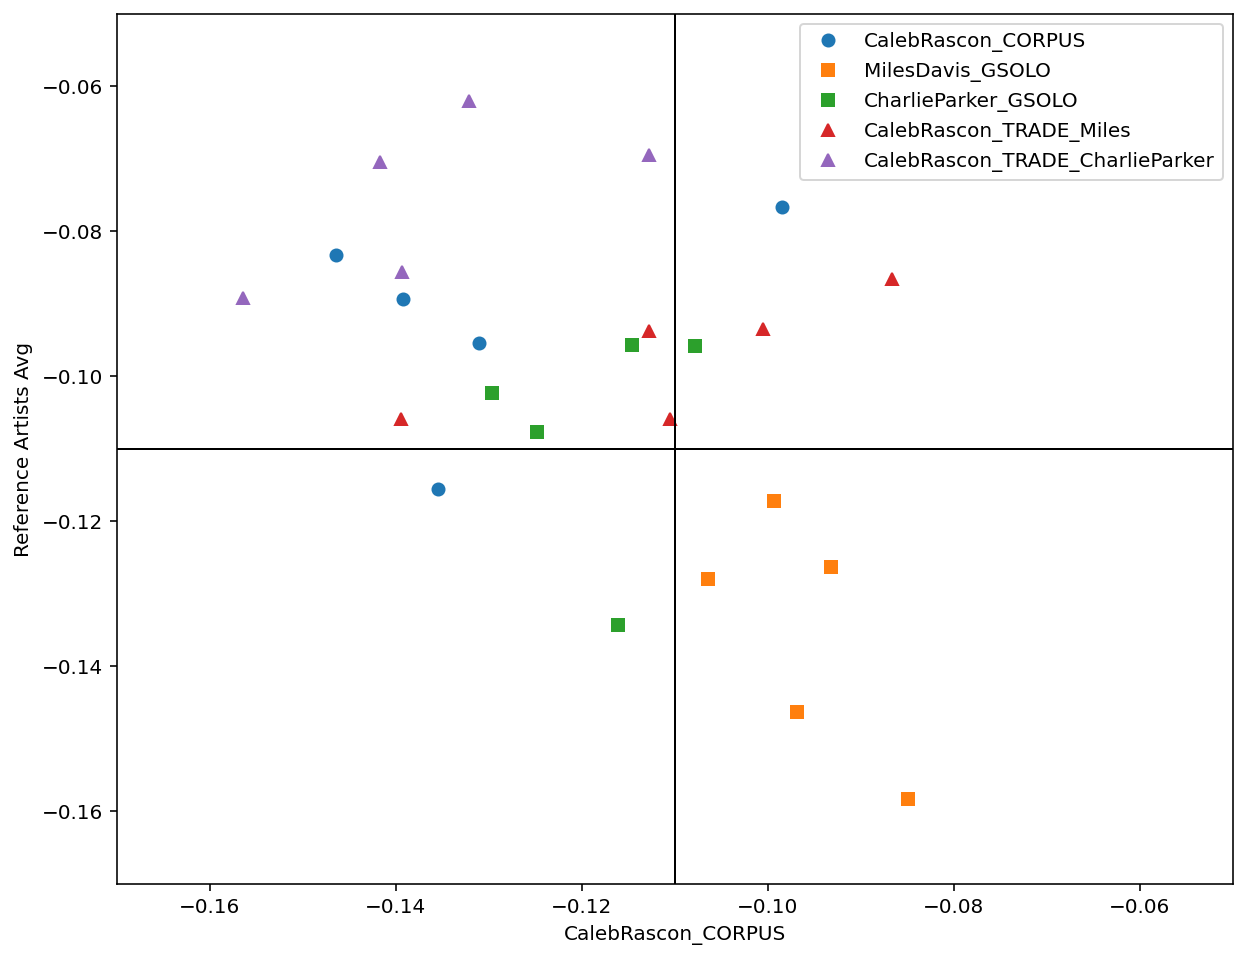

In [37]:
markers_plt = ['o', 's', 's', '^', '^', '^', '>', 's', 'd', ',']
# ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
marker_i = 0
plt.figure(figsize=(10,8))
plt.xlim(-0.17, -0.05);
plt.ylim(-0.17, -0.05);

for keyname_i in axis_X:
    current_X_values = []
    current_Y_values = []
    if ("CalebRascon_GSOLO" == keyname_i) or ("CalebRascon_TRADE_Caleb" == keyname_i) :
        continue
    for i in range(len(axis_X[keyname_i])): 
        # print(axis_X[keyname_i][i], axis_Y[keyname_i][i])
        current_X_values.append(axis_X[keyname_i][i])
        current_Y_values.append(axis_Y[keyname_i][i])
    
    plt.plot(current_X_values, current_Y_values, markers_plt[marker_i], label=keyname_i)
    marker_i += 1

plt.plot([-0.11, -0.11], [-0.17, -0.05], 'k-', lw=1)
plt.plot([-0.17, -0.05], [-0.11, -0.11], 'k-', lw=1)
plt.legend(numpoints=1)
plt.xlabel("CalebRascon_CORPUS")
plt.ylabel("Reference Artists Avg")